<a href="https://colab.research.google.com/github/ZeroOFBright/Data-Anonymization/blob/main/Test_Data_Anonimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import Data

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/patients.csv")

Data Encryption: FIRST + LAST 

Masking: SSN (ขอแบบสามารถกำหนด position (single + multiple positions) 
ในการ Masking ได้ด้วยนะคะ)

Generalization: BIRTHDATE

In [ ]:
df

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaN,999-27-3385,S99971451,X53218815X,Mr.,Jayson808,Fadel536,NaN,NaN,S,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaN,999-73-2461,S99956432,NaN,NaN,Jimmie93,Harris789,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaN,999-60-7372,S99917327,X58903159X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12347,eec72396-d10e-4b8e-8fb6-25fc1e396031,1962-08-17,NaN,999-52-5112,S99981543,X65879689X,Mrs.,Althea11,O'Hara248,NaN,Swaniawski813,M,asian,nonhispanic,F,Delhi Delhi IN,682 Koss Trafficway Apt 65,Wellesley,Massachusetts,Norfolk County,2457.0,42.294175,-71.259364,1332256.08,7157.90
12348,3daf2b90-c439-469f-bb44-fb6109c6a8a7,1918-10-20,1999-11-01,999-25-1153,S99951005,X1374154X,Mrs.,Tarah156,Shields502,NaN,Keeling57,M,white,nonhispanic,F,New Bedford Massachusetts US,308 Huels Grove Apt 18,Waltham,Massachusetts,Middlesex County,2453.0,42.372663,-71.209053,1557234.62,27214.48
12349,cb03d88e-7f08-46a1-be78-70d9fe8262a7,1918-10-20,2009-08-07,999-41-7538,S99938113,X29702266X,Mrs.,Penny812,Pacocha935,NaN,Koelpin146,M,white,nonhispanic,F,Marshfield Massachusetts US,349 Breitenberg Walk Suite 26,Waltham,Massachusetts,Middlesex County,2452.0,42.396186,-71.217928,1347930.08,26001.41
12350,435be43f-cb57-442f-aeb2-51018b030ed0,1918-10-20,NaN,999-26-4571,S99995011,X51104300X,Ms.,Cherlyn665,Quitzon246,NaN,NaN,S,white,nonhispanic,F,Holyoke Massachusetts US,237 Miller Avenue,Waltham,Massachusetts,Middlesex County,2452.0,42.366768,-71.196715,1585631.29,32006.97


In [ ]:
a2 = df[:4500]

In [ ]:
a2.to_csv("test.csv")

# Data Masking



```

Data Masking - ปกปิดข้อมูลด้วยตัวอักษรที่สุ่มขึ้นมา ทำให้ยากในการหาข้อมูลที่ถูกปกปิดไป

เช่น บัตร ATM -> XXXX XXXX XXX 1234 (แสดงแค่เลข4ตัวสุดท้าย)

    Email -> XXXXnarXXXX@gmail.com  (แสดงบางส่วน)

    Hashing  Surasee -> asdfhsadfjasldlfasdfneradf






In [ ]:
from time import process_time


In [ ]:
a = "999-68-6630"
mask = a[:-4]
nomask = a[-4:]
alphabet = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
start = process_time()
for ch in alphabet :
  mask = mask.replace(ch,"X")
masked = mask+nomask
stop = process_time()

print(masked, "process time is :", stop-start)





XXX-XX-6630 process time is : 0.00011403699999990025


In [ ]:
b = "999-68-6630"
mask = b[:-4]
nomask = b[-4:]
start = process_time()
for i in mask :   # if and for loop detect A-Z a-z and 0-9
  if (ord("A") <= ord(i) <= ord("Z") ) or (ord("a") <= ord(i) <= ord("z")) or (ord("0") <= ord(i) <= ord("9")) :
    mask = mask.replace(i,"X")

masked = mask+nomask

stop = process_time()

print(masked, "process time is :", stop-start)


XXX-XX-6630 process time is : 0.000249693999999856


In [ ]:
c = "999-68-6630"
mask = c[:-4]
nomask = c[-4:]
alphabet2 = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
to =  "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
start = process_time()  
trantab = mask.maketrans(alphabet2,to)  
masked = mask.translate(trantab) + nomask  #use maketrans and translate function
stop = process_time()
print(masked, "process time is :", stop-start)


XXX-XX-6630 process time is : 0.00010163799999984846


In [ ]:
d = "999-68-6630"
mask = d[:-4]
nomask = d[-4:]
start = process_time()
for i in mask :   # if and for loop detect - 
  if (i != "-") :
    mask = mask.replace(i,"X")

masked = mask+nomask
stop = process_time()

print(masked, "process time is :", stop-start)


XXX-XX-6630 process time is : 0.0001235729999997659


**Data masking Function**

In [ ]:
def masking(input):
  string = input
  mask = string[:-4]
  nomask = string[-4:]
  alphabet = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
  to =  "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
  trantab = mask.maketrans(alphabet,to)
  return mask.translate(trantab) + nomask

def masking2( input ,start = 0 , stop = 0 ):   
  string = str(input)
  if start == 0 and stop == 0:    # if no position set 
    mask = string[start : -(len(string)//3 +(len(string)%3>0) )]   # masked the 2/3 of the string length // round up  
    nomask1 = string[:start]
    nomask2 = string[-(len(string)//3 + (len(string)%3>0)) : ] 
  else :
      mask = string[start:stop]
      nomask1 = string[:start]
      nomask2 = string[stop:]

  alphabet = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
  to =  "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
  trantab = mask.maketrans(alphabet,to)
  return nomask1 + mask.translate(trantab) + nomask2



def maskingDataframe(dataframe,column):
  df = dataframe.copy()
  df["SSN-MASK"] = df.apply(lambda row: masking2(row[column]), axis=1)

  return df 

In [ ]:
anonymize = maskingDataframe(df,"SSN")

In [ ]:
anonymize.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaN,XXX-XX-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaN,XXX-XX-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaN,XXX-XX-3385,S99971451,X53218815X,Mr.,Jayson808,Fadel536,NaN,NaN,S,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaN,XXX-XX-2461,S99956432,NaN,NaN,Jimmie93,Harris789,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaN,XXX-XX-7372,S99917327,X58903159X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04


# Hashing



```
#  เป็นเทคนิค Data Masking ปกปิดข้อมูลด้วยฟังก์ชั่นคณิตศาสตร์  

ฟังก์ชั่น hash เช่น MD5 , SHA-1 SHA-2 SHA-256 
```



In [ ]:
import hashlib

In [ ]:
name = "Mark Zuckerberg"
print(hashlib.sha1(b"Mark Zuckerberg").hexdigest())

2106b0b5ffc557b63f062a3249b9e1e568ea88d9


In [ ]:
name = "Mark Zuckerberg"
print(hashlib.sha1(name.encode()).hexdigest())

2106b0b5ffc557b63f062a3249b9e1e568ea88d9


In [ ]:
def hashingDataframe(dataframe,column):
  df = dataframe.copy()
  hashName = column + "-hash"
  df[hashName] = df.apply(lambda row : hashlib.sha1(row[column].encode()).hexdigest(), axis=1 )
  hashTable = df[[column,hashName]]
  df = df.drop(column,axis=1)
  return df ,hashTable

In [ ]:
anonymize["NAME"] = anonymize["FIRST"] + anonymize["LAST"]
anonymize = anonymize.drop(["FIRST" , "LAST"],axis=1)

anonymize.head()


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,NAME
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaN,XXX-XX-6630,NaN,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08,Jacinto644Kris249
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaN,XXX-XX-5895,NaN,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72,Alva958Krajcik437
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaN,XXX-XX-3385,S99971451,X53218815X,Mr.,NaN,NaN,S,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84,Jayson808Fadel536
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaN,XXX-XX-2461,S99956432,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64,Jimmie93Harris789
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaN,XXX-XX-7372,S99917327,X58903159X,Mr.,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04,Gregorio366Auer97


In [ ]:
anonymize , hashTable = hashingDataframe(anonymize,"NAME")
anonymize.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,NAME-hash
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaN,XXX-XX-6630,NaN,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08,0fba5d64abfabc75e21b691fd04760c8108d815d
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaN,XXX-XX-5895,NaN,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72,deebcefd284e87cf50650db8a675ae15aac011b1
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaN,XXX-XX-3385,S99971451,X53218815X,Mr.,NaN,NaN,S,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84,bfe354e209874d1d8013f055bb8a28553f05166e
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaN,XXX-XX-2461,S99956432,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64,9602fdeaad88b53e34c33431549af224cfed63ca
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaN,XXX-XX-7372,S99917327,X58903159X,Mr.,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04,1508df7e77411847d59eb4571114353433f4d669


# Generalization



```
# generalization =เปลี่ยนรูปข้อมูลให้อยู่ในรูปทั่วไป เพื่อเพิ่มความยากในการหาความเฉพาะ

เช่น อายุ 24 -> ช่วง 20 - 30
วดป เกิด 11/02/1995 ->  02/1995 , 1995 
ข้อมูลบ้านเลขที่ 1/1 ซ.กระเพรา ... กรุงเทพ 10520 ->  10520

``` **ทำข้อความเป็นตัวหนา**



**Test Algorithm**

In [ ]:
pd.DatetimeIndex(df["BIRTHDATE"]).year

Int64Index([2017, 2016, 1992, 2004, 1996, 2019, 1983, 1989, 1991, 2005,
            ...
            1960, 1975, 1980, 1990, 1960, 1962, 1918, 1918, 1918, 1941],
           dtype='int64', name='BIRTHDATE', length=12352)

In [ ]:
pd.to_datetime(df['BIRTHDATE']).dt.strftime('%Y-%m')

0        2017-08
1        2016-08
2        1992-06
3        2004-01
4        1996-11
          ...   
12347    1962-08
12348    1918-10
12349    1918-10
12350    1918-10
12351    1941-02
Name: BIRTHDATE, Length: 12352, dtype: object

In [ ]:
pd.to_datetime(df['BIRTHDATE']).dt.year + pd.to_datetime(df['BIRTHDATE']).dt.month

0        2025
1        2024
2        1998
3        2005
4        2007
         ... 
12347    1970
12348    1928
12349    1928
12350    1928
12351    1943
Name: BIRTHDATE, Length: 12352, dtype: int64

In [ ]:
anonymize["BIRTHDATE"] =  df.apply(lambda row : pd.to_datetime(row["BIRTHDATE"]).strftime('%Y-%m') ,axis = 1 )

In [ ]:
gen_year = df.copy()
gen_year["BIRTHDATE"] =  df.apply(lambda row : pd.to_datetime(row["BIRTHDATE"]).year ,axis = 1 )
gen_year.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992,NaN,999-27-3385,S99971451,X53218815X,Mr.,Jayson808,Fadel536,NaN,NaN,S,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004,NaN,999-73-2461,S99956432,NaN,NaN,Jimmie93,Harris789,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996,NaN,999-60-7372,S99917327,X58903159X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04


In [ ]:
anonymize.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,NAME-hash
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08,NaN,XXX-XX-6630,NaN,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08,0fba5d64abfabc75e21b691fd04760c8108d815d
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08,NaN,XXX-XX-5895,NaN,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72,deebcefd284e87cf50650db8a675ae15aac011b1
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06,NaN,XXX-XX-3385,S99971451,X53218815X,Mr.,NaN,NaN,S,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84,bfe354e209874d1d8013f055bb8a28553f05166e
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01,NaN,XXX-XX-2461,S99956432,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64,9602fdeaad88b53e34c33431549af224cfed63ca
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11,NaN,XXX-XX-7372,S99917327,X58903159X,Mr.,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04,1508df7e77411847d59eb4571114353433f4d669


In [ ]:
def bd_to_lifeAge(dataframe,column):
  current_year = 2021
  df = dataframe.copy()

  df[column] = np.where(current_year - pd.DatetimeIndex(df[column]).year < 14, "Child" ,
                    np.where(current_year - pd.DatetimeIndex(df[column]).year < 24,  "Youth",
                    np.where(current_year - pd.DatetimeIndex(df[column]).year < 64 , "Adult", "Elder"  )))


  return df

In [ ]:
test = bd_to_lifeAge(anonymize,"BIRTHDATE")
test.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,NAME-hash
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,Child,NaN,XXX-XX-6630,NaN,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08,0fba5d64abfabc75e21b691fd04760c8108d815d
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,Child,NaN,XXX-XX-5895,NaN,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72,deebcefd284e87cf50650db8a675ae15aac011b1
2,ae9efba3-ddc4-43f9-a781-f72019388548,Adult,NaN,XXX-XX-3385,S99971451,X53218815X,Mr.,NaN,NaN,S,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84,bfe354e209874d1d8013f055bb8a28553f05166e
3,199c586f-af16-4091-9998-ee4cfc02ee7a,Youth,NaN,XXX-XX-2461,S99956432,NaN,NaN,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64,9602fdeaad88b53e34c33431549af224cfed63ca
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,Adult,NaN,XXX-XX-7372,S99917327,X58903159X,Mr.,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04,1508df7e77411847d59eb4571114353433f4d669


# Shuffling 



```
# Shuffling  - สลับข้อมูลในแถวเพื่อไม่ให้สามารถนำ non-direct identifier มาตามรอยได้
```



In [ ]:
def shuffle(df, n=1, axis=0):     
        df = df.copy()
        for _ in range(n):
            df.apply(np.random.shuffle, axis=axis)
        return df

In [ ]:
test3 = pd.DataFrame({'A':range(10), 'B':range(10)})
test3

,A,B
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [ ]:
test3 = shuffle(test3,1)
test3

,A,B
0,6,0
1,5,5
2,0,4
3,2,1
4,8,9
5,1,8
6,4,7
7,9,3
8,3,6
9,7,2


# Data Visualize

In [ ]:
df["BIRTHDATE"].nunique()  # จำนวนค่าที่ไม่ซ้ำกัน ของแถว BIRTHDATE 

8571

In [ ]:
anonymize["BIRTHDATE"].nunique()

1193

In [ ]:
anonymize["BIRTHDATE"].value_counts()

1914-06    33
1969-05    28
1936-01    25
1964-11    25
1956-11    25
           ..
1921-09     1
1917-05     1
1918-04     1
1919-05     1
1918-05     1
Name: BIRTHDATE, Length: 1193, dtype: int64

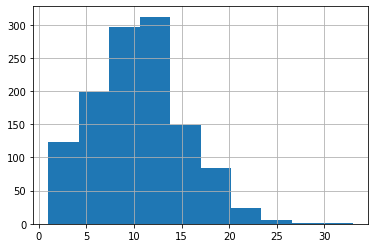

In [ ]:
anonymize["BIRTHDATE"].value_counts().hist()  # แสดงผลจำนวน data ที่มี Year-month จำนวนต่างๆ  จะเห็นได้ว่าถึงแม้จะ generalization ไปแล้วก็ยังไม่เพียงพอ

In [ ]:
gen_year["BIRTHDATE"].value_counts()

1969    190
1962    183
1961    182
1967    181
1964    174
       ... 
1911     30
1918     29
1926     22
1919     13
1909      4
Name: BIRTHDATE, Length: 112, dtype: int64

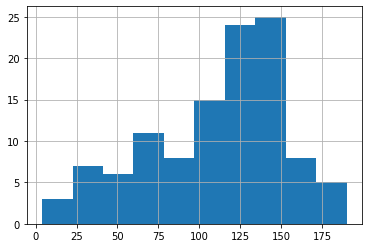

In [ ]:
gen_year["BIRTHDATE"].value_counts().hist() 

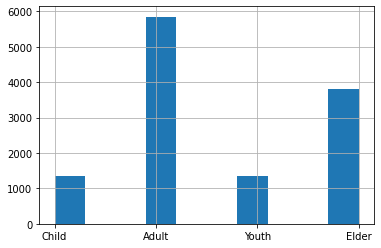

In [ ]:
test["BIRTHDATE"].hist()

# function Check unique value 

In [ ]:
a = pd.DataFrame({'A':[1,2,3,4,5,1], 'B':[1,2,3,4,4,1]})
a

,A,B
0,1,1
1,2,2
2,3,3
3,4,4
4,5,4
5,1,1


In [ ]:
def isOneToOne(df, col1, col2):
    first = df.groupby(col1)[col2].count().max()
    second = df.groupby(col2)[col1].count().max()
    return first + second == 2

In [ ]:
isOneToOne(a,"A","B")

False

In [ ]:
def isOneToOne2(df, col1, col2):
    first = df[col1].nunique()
    second = df[col2].nunique()
    return first == second

In [ ]:
def isOneToOne3(df, col1, col2):
    df2 = df.copy()
    first = df2[col1].nunique()
    second = df2[col2].nunique()
    
    df2["duplicate"] = df2[col2].duplicated(keep=False)

    return df2
 


In [ ]:
isOneToOne2(a,"A","B")


False

In [ ]:
b = pd.DataFrame({'A':[1,2,3,4,5,1], 'B':[1,2,3,4,5,1]})
b

,A,B
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,1,1


In [ ]:
isOneToOne(b,"A","B")

False

In [ ]:
isOneToOne2(b,"A","B")

True

In [ ]:
c = isOneToOne3(b,"A","B")
c

,A,B,duplicate
0,1,1,True
1,2,2,False
2,3,3,False
3,4,4,False
4,5,5,False
5,1,1,True


# ARXaaS

In [ ]:
!pip install pandas==1.1.0
!pip install pyarxaas


  Using cached https://files.pythonhosted.org/packages/61/af/ceb7523e86753d5643ed00e8c17a42bdcfe819782c3449d9bbbf5d01867a/pandas-1.0.1-cp37-cp37m-manylinux1_x86_64.whl
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.0.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 1.0.1 which is incompatible.
  Found existing installation: pandas 1.1.0
    Uninstalling pandas-1.1.0:
      Successfully uninstalled pandas-1.1.0


In [ ]:
from pyarxaas import Dataset

dataset = Dataset.from_pandas(df)



In [ ]:
from pyarxaas import AttributeType

dataset.set_attribute_type(AttributeType.QUASIIDENTIFYING, 'FIRST', 'GENDER')
dataset.set_attribute_type(AttributeType.IDENTIFYING, 'Id')

In [ ]:
from pyarxaas.privacy_models import KAnonymity

# creating a privacy_models object
kanon = KAnonymity(4)

In [ ]:
# import the aaas module
from pyarxaas import ARXaaS

# establishing a connection to the ARXaaS service using the URL
arxaas = ARXaaS("http://localhost:8080")

In [ ]:
# specify the dataset as the first parameter, and privacy model list as the second paramter
anonymize_result = arxaas.anonymize(dataset, [kanon])

RequestException: ignored

In [ ]:
# get the new dataset
anonymized_dataset = anonymize_result.dataset
anon_dataframe = anonymized_dataset.to_dataframe()

# get the risk profile for the new dataset
anon_risk_profile = anonymize_result.risk_profile

# get risk metrics as a dictionary
re_indentifiation_risk = anon_risk_profile.re_identification_risk
distribution_of_risk = anon_risk_profile.distribution_of_risk

# get risk metrivs as pandas.DataFrame
re_i_risk_df = anon_risk_profile.distribution_of_risk_dataframe()
dist_risk_df = anon_risk_profile.distribution_of_risk_dataframe()

# get the anonymiztion metrics
anon_metrics = anonymize_result.anonymization_metrics

# Anonymizedf

In [ ]:
!pip install anonymizedf
from anonymizedf.anonymizedf import anonymize


     |████████████████████████████████| 1.2MB 6.3MB/s 


```
fake_names()  ,  fake_ids()  ,  fake_whole_numbers()  fake_categories() , fake_dates() , fake_decimal_numbers()
```



In [ ]:
an = anonymize(df)
an

In [ ]:
fake_df = an.fake_names("FIRST")
fake_df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,Fake_FIRST
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08,Dr. Tom Powell
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72,Jordan Moore-Harris
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaN,999-27-3385,S99971451,X53218815X,Mr.,Jayson808,Fadel536,NaN,NaN,S,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84,Mrs. Michelle Collins
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaN,999-73-2461,S99956432,NaN,NaN,Jimmie93,Harris789,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64,Olivia Turner
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaN,999-60-7372,S99917327,X58903159X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04,Ms. Georgina Lucas


In [ ]:
show1 = fake_df[["FIRST","Fake_FIRST"]].copy()
show1 = show1.sort_values(by=["Fake_FIRST"])
show1

,FIRST,Fake_FIRST
11313,Oren284,Aaron Andrews
4982,Oren284,Aaron Andrews
10080,Oren284,Aaron Andrews
2968,Oren284,Aaron Andrews
11186,Oren284,Aaron Andrews
...,...,...
9005,Ehtel928,Zoe Knight-Jordan
2496,Ehtel928,Zoe Knight-Jordan
8924,Euna523,Zoe Perry
3032,Euna523,Zoe Perry


In [ ]:
show1 = show1.drop_duplicates(subset=["FIRST"]).reset_index(drop=True)
show1 = show1.sort_values(by=["Fake_FIRST"])
show1

,FIRST,Fake_FIRST
0,Oren284,Aaron Andrews
1,Barbie211,Aaron Baker
2,Efren426,Aaron Burrows
3,Jorge203,Aaron Hall
4,Tawanda156,Aaron Hawkins
...,...,...
4215,Shane235,Zoe Hall
4216,Eneida722,Zoe Kaur
4217,Ehtel928,Zoe Knight-Jordan
4218,Euna523,Zoe Perry


In [ ]:
isOneToOne2(show1,"FIRST","Fake_FIRST")

False

In [ ]:
dup = isOneToOne3(show1,"FIRST","Fake_FIRST")
dup[dup["duplicate"]==True]

,FIRST,Fake_FIRST,duplicate
136,Denny560,Amanda Taylor,True
137,Kenny207,Amanda Taylor,True
364,Cheree978,Brenda Davies,True
365,Oswaldo857,Brenda Davies,True
428,Gilbert263,Carl Evans,True
...,...,...,...
3829,Marin763,Sarah Green,True
4009,Burton124,Susan Edwards,True
4010,Mara755,Susan Edwards,True
4145,Carson894,Vanessa Smith,True


In [ ]:
df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,Fake_FIRST
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,NaN,NaN,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08,Dr. Tom Powell
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,NaN,NaN,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72,Jordan Moore-Harris
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaN,999-27-3385,S99971451,X53218815X,Mr.,Jayson808,Fadel536,NaN,NaN,S,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84,Mrs. Michelle Collins
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaN,999-73-2461,S99956432,NaN,NaN,Jimmie93,Harris789,NaN,NaN,NaN,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64,Olivia Turner
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaN,999-60-7372,S99917327,X58903159X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04,Ms. Georgina Lucas


In [ ]:
test = df[["FIRST","SSN","LAT","RACE","BIRTHDATE"]].copy()
test.head()

,FIRST,SSN,LAT,RACE,BIRTHDATE
0,Jacinto644,999-68-6630,42.151961,white,2017-08-24
1,Alva958,999-15-5895,42.177370,white,2016-08-01
2,Jayson808,999-27-3385,42.181642,white,1992-06-30
3,Jimmie93,999-73-2461,42.075292,white,2004-01-09
4,Gregorio366,999-60-7372,42.352434,white,1996-11-15


In [ ]:
an2 = anonymize(test)

In [ ]:
fake =  an2.fake_names("FIRST",chaining=True).fake_ids("SSN",chaining=True).fake_decimal_numbers("LAT",chaining=True).fake_categories("RACE",chaining=True).fake_dates("BIRTHDATE")
fake

,FIRST,SSN,LAT,RACE,BIRTHDATE,Fake_FIRST,Fake_SSN,Fake_LAT,Fake_RACE,Fake_BIRTHDATE
0,Jacinto644,999-68-6630,42.151961,white,2017-08-24,Ms. Julie Blake,OPGI94634396565586,41.36,RACE 1,2015-05-09
1,Alva958,999-15-5895,42.177370,white,2016-08-01,Liam Moss,AJLP33037307601083,42.62,RACE 1,2011-03-19
2,Jayson808,999-27-3385,42.181642,white,1992-06-30,Sam Williams,HRYO38651689275665,41.39,RACE 1,2007-01-17
3,Jimmie93,999-73-2461,42.075292,white,2004-01-09,Brett Patel,XONS13933983831558,41.68,RACE 1,2003-05-14
4,Gregorio366,999-60-7372,42.352434,white,1996-11-15,Shirley Mahmood,FZDO18436247748399,41.98,RACE 1,2008-12-07
...,...,...,...,...,...,...,...,...,...,...
12347,Althea11,999-52-5112,42.294175,asian,1962-08-17,Kayleigh Johnson,LDRX27628346719848,42.60,RACE 3,1994-03-29
12348,Tarah156,999-25-1153,42.372663,white,1918-10-20,Jasmine Clark-Hamilton,VITH85792741266586,41.67,RACE 1,1972-12-13
12349,Penny812,999-41-7538,42.396186,white,1918-10-20,Tony Shaw,TOLE69011182636265,41.65,RACE 1,1972-12-13
12350,Cherlyn665,999-26-4571,42.366768,white,1918-10-20,Liam Mistry,RGXK64836453158749,41.25,RACE 1,1972-12-13


In [ ]:
fake.nunique()

FIRST              4220
SSN               12254
LAT               12352
RACE                  5
BIRTHDATE          8571
Fake_FIRST         4173
Fake_SSN          12254
Fake_LAT            167
Fake_RACE             5
Fake_BIRTHDATE     6881
dtype: int64

# Faker & Mimesis

In [ ]:
!pip install faker

     |████████████████████████████████| 1.2MB 5.1MB/s 


In [ ]:
from faker import Faker
import pandas as pd
import random
fake = Faker()
def create_rows_faker(num=1):
    output = [{"name":fake.name(),
                   "address":fake.address(),
                   "name":fake.name(),
                   "email":fake.email(),
                   #"bs":fake.bs(),
                   "city":fake.city(),
                   "state":fake.state(),
                   "date_time":fake.date_time(),
                   #"paragraph":fake.paragraph(),
                   #"Conrad":fake.catch_phrase(),
                   "randomdata":random.randint(1000,2000)} for x in range(num)]
    return output

df_faker = pd.DataFrame(create_rows_faker(5000))

In [ ]:
df_faker

,name,address,email,city,state,date_time,randomdata
0,Brittney Flores,"254 Kathleen Greens Apt. 405\nNew Margaret, NE...",twilliams@hotmail.com,West Stephanie,Utah,2005-04-10 08:07:55,1992
1,Ashley Conway,"79729 Jason Meadow\nMichaelfort, MI 63323",qsantana@davenport.info,Henryton,Connecticut,2010-03-21 22:33:03,1175
2,Jessica Medina,"11482 Steven Tunnel\nPettymouth, OR 89752",ppierce@rodriguez-ibarra.info,West Johnmouth,Georgia,2015-05-29 00:17:49,1789
3,Jason Mckinney,5857 Williams Trafficway Apt. 124\nPort Ashley...,trevorgarcia@gmail.com,Joshuaville,Mississippi,2019-12-21 00:06:16,1714
4,Nicholas Faulkner,"324 Jonathan Path\nNelsonbury, NC 98673",christineowen@hotmail.com,Kevinhaven,Alabama,2021-03-05 12:58:58,1761
...,...,...,...,...,...,...,...
4995,Jennifer Vargas,"284 Whitaker Valley Suite 380\nBeststad, OR 18291",michael49@gmail.com,East Brooketon,Washington,1994-12-08 20:38:46,1461
4996,Wendy Williams,"901 Gomez Plains\nJordanshire, AR 20113",zwright@hotmail.com,Martinezland,Oklahoma,1981-02-24 13:13:34,1071
4997,Charles Burton,"433 Carter Trace Apt. 627\nWest Jill, DC 70395",dcollins@hotmail.com,Port Stephenfort,New Jersey,1987-02-18 15:00:31,1270
4998,Michael Adams,"3534 Johnson Prairie Apt. 206\nMitchellhaven, ...",rpaul@mendoza-rowland.com,Kendraton,Connecticut,1995-04-27 12:55:38,1120


In [ ]:
!pip install mimesis

In [ ]:
from mimesis import Person
from mimesis import Address
from mimesis.enums import Gender
from mimesis import Datetime
person = Person('en')
import pandas as pd
import random
person = Person()
addess = Address()
datetime = Datetime()
def create_rows_mimesis(num=1):
    output = [{"name":person.full_name(gender=Gender.FEMALE),
                   "address":addess.address(),
                   "name":person.name(),
                   "email":person.email(),
                   #"bs":person.bs(),
                   "city":addess.city(),
                   "state":addess.state(),
                   "date_time":datetime.datetime(),
                   #"paragraph":person.paragraph(),
                   #"Conrad":person.catch_phrase(),
                   "randomdata":random.randint(0,2000)} for x in range(num)]
    return output

df_mimesis = pd.DataFrame(create_rows_mimesis(500))

In [ ]:
df_mimesis

,name,address,email,city,state,date_time,randomdata
0,Jeromy,618 Sola Mews,dichter1869@protonmail.com,Spartanburg,Idaho,2007-05-14 10:44:21.657231,877
1,Gene,1005 Borica Street,cottonmouth2036@live.com,Lake Zurich,New York,2003-03-16 07:02:56.073730,1259
2,Leisha,373 Brooklyn Alley,pondering1878@gmail.com,Del Rio,Virginia,2013-01-24 17:39:08.804821,539
3,Dean,449 Cuvier Square,antagonizing1921@outlook.com,Kentwood,Massachusetts,2010-12-10 01:45:16.253876,1561
4,Analisa,304 Marin Street,salar1833@outlook.com,Lacey,Pennsylvania,2011-05-01 17:17:21.255659,1965
...,...,...,...,...,...,...,...
495,Jeni,792 Plymouth Crescent,lariated2040@gmail.com,South San Francisco,Connecticut,2019-05-16 00:19:41.664844,1113
496,Wayne,17 Marin Walk,lion1930@outlook.com,Highland,Massachusetts,2003-05-20 12:49:25.537835,1358
497,Norberto,72 Guttenberg Point,wilders2002@outlook.com,South Jordan,Iowa,2020-01-28 22:57:23.897353,1167
498,Elroy,1028 Virginia Drive,carambole1867@protonmail.com,Pembroke Pines,Oregon,2001-02-26 01:34:08.744430,603


# Add noise to data

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
!pip install mimesis

     |████████████████████████████████| 2.8MB 5.1MB/s 
  Created wheel for mimesis: filename=mimesis-4.1.3-cp37-none-any.whl size=2849727 sha256=7c7225c098fdb1c057366dacf9aae4b86a835567a3ba8774e8aa357d35dec287
  Stored in directory: /root/.cache/pip/wheels/62/9f/72/6528c19b53d5861565e0ee62a6a2c0b1a961ea6e4dc96f36b7
Successfully built mimesis


In [ ]:
from mimesis import Person
from mimesis import Address
from mimesis.enums import Gender
from mimesis import Datetime
person = Person('en')
import pandas as pd
import random
person = Person()
addess = Address()
datetime = Datetime()
def create_rows_mimesis(num=1):
    output = [{"name":person.full_name(gender=Gender.FEMALE),
                   "address":addess.address(),
                   "name":person.name(),
                   "email":person.email(),
                   "city":addess.city(),
                   "state":addess.state(),
                   "GPA":round(random.uniform(1.0,4.0), 2 ) } for x in range(num)]
    return output

df_mimesis = pd.DataFrame(create_rows_mimesis(500))
df_mimesis

,name,address,email,city,state,GPA
0,Shani,801 Lake Merced Hill Trail,colorate1892@yahoo.com,Simi Valley,West Virginia,3.06
1,Malka,517 Bridgeview Side road,protomartyr1810@gmail.com,St. Matthews,Hawaii,3.10
2,Janae,124 Santa Cruz Esplanade,coghlan2033@outlook.com,Southgate,California,2.75
3,George,135 Eaton Garden,willowweed1968@yandex.com,Clearfield,Minnesota,2.77
4,Cornelius,580 Dormitory Gate,abstruseness1835@live.com,Keller,Pennsylvania,2.65
...,...,...,...,...,...,...
495,Ezequiel,601 Homewood Highway,serglobulin2061@gmail.com,Wasco,Michigan,1.14
496,Erlene,868 Huron Lane,capriole1907@yandex.com,Cincinnati,Oregon,2.44
497,Angel,581 Letterman Freeway,altruistic1810@protonmail.com,St. Peters,Alaska,2.56
498,Aide,392 Sonora Gate,macaw1858@live.com,Pekin,Arizona,1.79


In [ ]:
df_mimesis["Noise"] = np.random.normal(0,2,df_mimesis["GPA"].shape) 

In [ ]:
df_mimesis["GPA-Noise"] =  df_mimesis["GPA"] + df_mimesis["Noise"]

In [ ]:
df_mimesis

,name,address,email,city,state,GPA,Noise,GPA-Noise
0,Shani,801 Lake Merced Hill Trail,colorate1892@yahoo.com,Simi Valley,West Virginia,3.06,1.511368,4.571368
1,Malka,517 Bridgeview Side road,protomartyr1810@gmail.com,St. Matthews,Hawaii,3.10,4.450538,7.550538
2,Janae,124 Santa Cruz Esplanade,coghlan2033@outlook.com,Southgate,California,2.75,-3.416753,-0.666753
3,George,135 Eaton Garden,willowweed1968@yandex.com,Clearfield,Minnesota,2.77,1.126320,3.896320
4,Cornelius,580 Dormitory Gate,abstruseness1835@live.com,Keller,Pennsylvania,2.65,0.772775,3.422775
...,...,...,...,...,...,...,...,...
495,Ezequiel,601 Homewood Highway,serglobulin2061@gmail.com,Wasco,Michigan,1.14,-1.845307,-0.705307
496,Erlene,868 Huron Lane,capriole1907@yandex.com,Cincinnati,Oregon,2.44,-0.104040,2.335960
497,Angel,581 Letterman Freeway,altruistic1810@protonmail.com,St. Peters,Alaska,2.56,1.350403,3.910403
498,Aide,392 Sonora Gate,macaw1858@live.com,Pekin,Arizona,1.79,0.957899,2.747899


In [ ]:
noise = np.random.normal(0,2,df_mimesis["GPA"].shape)

In [ ]:
df_mimesis

,name,address,email,city,state,GPA,Noise,GPA-Noise
0,Shani,801 Lake Merced Hill Trail,colorate1892@yahoo.com,Simi Valley,West Virginia,3.06,1.511368,4.571368
1,Malka,517 Bridgeview Side road,protomartyr1810@gmail.com,St. Matthews,Hawaii,3.10,4.450538,7.550538
2,Janae,124 Santa Cruz Esplanade,coghlan2033@outlook.com,Southgate,California,2.75,-3.416753,-0.666753
3,George,135 Eaton Garden,willowweed1968@yandex.com,Clearfield,Minnesota,2.77,1.126320,3.896320
4,Cornelius,580 Dormitory Gate,abstruseness1835@live.com,Keller,Pennsylvania,2.65,0.772775,3.422775
...,...,...,...,...,...,...,...,...
495,Ezequiel,601 Homewood Highway,serglobulin2061@gmail.com,Wasco,Michigan,1.14,-1.845307,-0.705307
496,Erlene,868 Huron Lane,capriole1907@yandex.com,Cincinnati,Oregon,2.44,-0.104040,2.335960
497,Angel,581 Letterman Freeway,altruistic1810@protonmail.com,St. Peters,Alaska,2.56,1.350403,3.910403
498,Aide,392 Sonora Gate,macaw1858@live.com,Pekin,Arizona,1.79,0.957899,2.747899


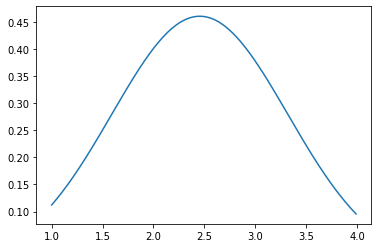

[1.0, 1.01, 1.02, 1.03, 1.03, 1.05, 1.06, 1.06, 1.06, 1.07, 1.07, 1.07, 1.08, 1.08, 1.08, 1.09, 1.1, 1.13, 1.14, 1.14, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.16, 1.16, 1.17, 1.17, 1.17, 1.18, 1.18, 1.18, 1.19, 1.19, 1.2, 1.21, 1.22, 1.22, 1.23, 1.23, 1.23, 1.24, 1.24, 1.25, 1.25, 1.25, 1.26, 1.27, 1.28, 1.3, 1.3, 1.31, 1.31, 1.31, 1.31, 1.32, 1.32, 1.33, 1.33, 1.33, 1.33, 1.34, 1.34, 1.35, 1.35, 1.36, 1.36, 1.37, 1.38, 1.38, 1.38, 1.39, 1.4, 1.41, 1.42, 1.42, 1.43, 1.43, 1.46, 1.46, 1.46, 1.48, 1.48, 1.48, 1.48, 1.49, 1.5, 1.5, 1.5, 1.51, 1.51, 1.52, 1.52, 1.53, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.59, 1.6, 1.6, 1.6, 1.61, 1.61, 1.62, 1.64, 1.65, 1.65, 1.66, 1.66, 1.67, 1.67, 1.68, 1.68, 1.69, 1.7, 1.71, 1.71, 1.71, 1.72, 1.72, 1.72, 1.72, 1.72, 1.73, 1.73, 1.73, 1.74, 1.74, 1.74, 1.75, 1.75, 1.77, 1.78, 1.78, 1.79, 1.79, 1.79, 1.8, 1.8, 1.81, 1.82, 1.83, 1.85, 1.85, 1.85, 1.85, 1.86, 1.86, 1.86, 1.87, 1.87, 1.89, 1.91, 1.91, 1.91, 1.92, 1.92, 1.92, 1.94, 1.94, 1.95, 1.96, 1.96, 1.96, 

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  
# Plot between -10 and 10 with .001 steps.
x_axis = df_mimesis["GPA"].tolist()

x_axis = sorted(x_axis)

# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

print(x_axis)


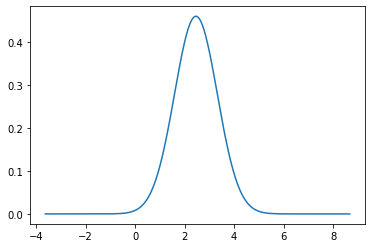

[-3.635759822841779, -3.051761640360267, -3.030615302051885, -3.014468764870972, -2.8553995072427005, -2.761336288647373, -2.466113129372663, -2.385170802649184, -2.356626276087428, -2.288647359344353, -2.205598848090703, -2.034479489191818, -1.9262295907035005, -1.7628973822327798, -1.761331161586944, -1.7330412519948568, -1.7304226454754446, -1.7086062290701802, -1.6872773343868162, -1.6386155858257139, -1.6344409212363142, -1.545712857045575, -1.506617894669578, -1.4819726722918372, -1.4623092376014293, -1.4403889835989128, -1.3593796738389499, -1.3014484316756518, -1.2771007834284933, -1.2721016848029079, -1.2268994789791594, -1.1636216759055547, -1.1166303221842404, -1.0289914753077716, -1.010088627142486, -0.965407057076832, -0.9080228980234701, -0.7800096902000972, -0.7743422758037051, -0.7530643647058217, -0.7197897408725853, -0.7053068041757706, -0.6992227822431558, -0.6723754450267694, -0.6667531109863836, -0.5888003799943249, -0.5602861769457821, -0.5512096623636702, -0.5374

In [ ]:
# Plot between -10 and 10 with .001 steps.
x_axis = df_mimesis["GPA-Noise"].tolist()

x_axis = sorted(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

print(x_axis)


# Encrypt HI Number from 8 digits to 10 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import random

def create_rows_mimesis(num=1):
    output = [{ "HI": "%0.8d" % random.randint(0,99999999)} for x in range(num)]
    return output

df = pd.DataFrame(create_rows_mimesis(500000))

In [ ]:
df

,HI
0,75541691
1,52495733
2,58548541
3,45022575
4,49138575
...,...
499995,96414241
499996,60869064
499997,08345870
499998,93540261


In [ ]:
df = df.drop_duplicates().reset_index(drop=True)
df

,HI
0,75541691
1,52495733
2,58548541
3,45022575
4,49138575
...,...
498734,96414241
498735,60869064
498736,08345870
498737,93540261


In [ ]:
def decimalToBinary(n):
  
  binary = bin(int(n)).replace("0b", "")
  
  return "%0.4d" % int(binary)
       

In [ ]:
decimalToBinary(2)

'0010'

In [ ]:
input = "09764123"

temp = []
li1 = []
li2 = []

for i in range(8):
  if i < 4 :
      li1.append(decimalToBinary(input[i]))
  else:
      li2.append(decimalToBinary(input[i]))
  
print("list 1 is :", li1)
print("list 2 is :", li2)



list 1 is : ['0000', '1001', '0111', '0110']
list 2 is : ['0100', '0001', '0010', '0011']


In [ ]:
li1[0][3] 

'0'

In [ ]:
last1 = "0"
last2 = "0"
for i in range(1,4):
  last1 += li1[i][3]
  last2 += li2[i][3]

sum =   decimalToBinary( int(last1,2) + int(last2,2) )

last1,last2,sum

('0110', '0101', '1011')

In [ ]:
for i in range(1,4) :
  li1[i] = li1[i][:-1] + sum[i]  
  li2[i] = li2[i][:-1] + sum[i]  


print(li1, li2)


['0001', '1000', '0111', '0111'] ['0101', '0000', '0011', '0011']


In [ ]:
summary = "".join(li1) + last1 + "".join(li2) + last2
print(summary)

print(int(summary,2))


0001100001110111011001010000001100110101
105082323765


In [ ]:
def encrypt(input):

  def decimalToBinary(n):
    binary = bin(int(n)).replace("0b", "")
    return "%0.4d" % int(binary)

  li1 = []
  li2 = []
  
  for i in range(8):  # seperate string to 4 - 4  turn it in to binary
    if i < 4 :
        li1.append(decimalToBinary(input[i]))
    else:
        li2.append(decimalToBinary(input[i]))
    
  #print("list 1 is :", li1)
  #print("list 2 is :", li2)

  last1 = "0"
  last2 = "0"

  for i in range(1,4):   # get 3 digit of seperate binary
    last1 += li1[i][3]
    last2 += li2[i][3]

  sum =   decimalToBinary( int(last1,2) + int(last2,2) )  # sum the 2 of last 3 digit 

  #print("sum is : ", sum)

  for i in range(1,4) :  # replace the last digit of seperate binary
    li1[i] = li1[i][:-1] + sum[i]  
    li2[i] = li2[i][:-1] + sum[i]  

  summary = []  
  
  for i in li1 :
    summary.append(str(int(i,2)))

  summary.append( str( int(last1,2) ) )


  for i in li2 :
     summary.append(str(int(i,2)))
  
  summary.append( str( int(last2,2) ) )
  #print(summary)
  
  #temp = "".join(li1) + last1 + "".join(li2) + last2  #concat all seperate binary
 
  # summary = []
  # for i in range(0,40,4) : 
  #   summary = int(temp[i:i+4])
  
  summary = "".join(summary)

  return summary 


In [ ]:
enc = encrypt("09764123")
enc

'0877640335'

In [ ]:
def decrypt(input) :
  def decimalToBinary(n):
    binary = bin(int(n)).replace("0b", "")
    return "%0.4d" % int(binary)

  li1 = []
  li2 = []
  binary = ""
  for i in range(len(input)):
    binary += decimalToBinary(input[i])

  #print(binary)
  for i in range(0,20,4) :
    li1.append(binary[i:i+4])
    li2.append(binary[i+20:i+24])

  #print(li1,li2)

  temp1 = li1.pop()
  temp2 = li2.pop()
  
  #print(temp1,temp2)

  for i in range(1,4):
    li1[i] = li1[i][:-1] + temp1[i]  
    li2[i] = li2[i][:-1] + temp2[i]  
  
  #print(li1,li2)

  for i in range(4):
    li1[i] =  str(int( li1[i] , 2 )) 
    li2[i] =  str(int( li2[i] , 2 ))  

  summary = "".join(li1) + "".join(li2)

  

  return summary 

decrypt(enc)

'09764123'

In [ ]:
df["HI-Encrypt"] = df.apply(lambda row : encrypt(row["HI"]) , axis = 1) 
df

,HI,HI-Encrypt
0,75541691,7445616813
1,52495733,5248156227
2,58548541,5955285515
3,45022575,4413424757
4,49138575,4912785747
...,...,...
498734,96414241,9650142501
498735,60869064,6086090640
498736,08345870,0924259602
498737,93540261,9355603711


In [ ]:
isOneToOne(df,"HI","HI-Encrypt")

True

# ส่วนใหม่

In [ ]:
def sumString(input):
  sum = 0
  for i in range(len(input)):
    sum = sum + int(input[i])
  return sum

In [ ]:
df["sum"] = df.apply(lambda row: sumString(row["HI"]), axis=1)

In [ ]:
df

,HI,sum
0,12846856,40
1,48948323,41
2,54651489,42
3,24066553,31
4,83167073,35
...,...,...
498734,90331902,27
498735,43941393,36
498736,74159694,45
498737,30222484,25


In [ ]:
a = "1234567"
print(sumString(a))

28
